In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[*********************100%***********************]  4 of 4 completed


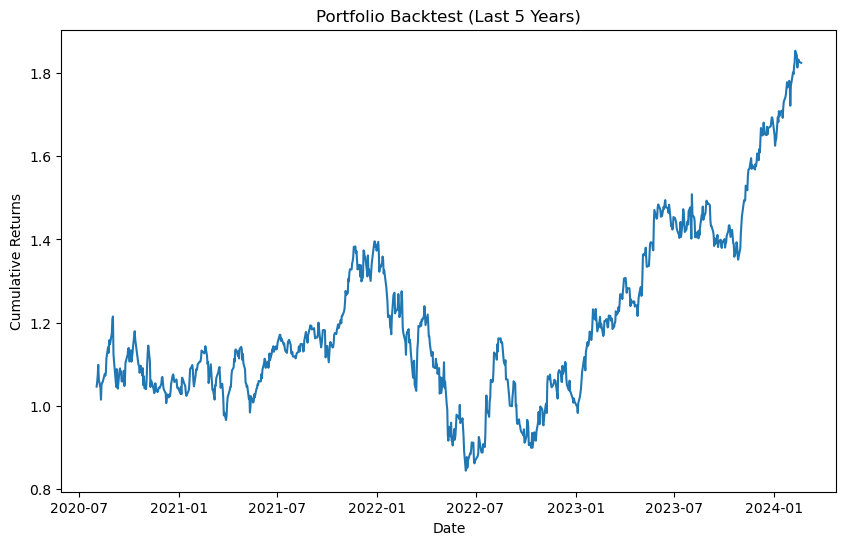

In [30]:
def get_data(tickers, start, end):
    data = yf.download(tickers, start=start, end=end, auto_adjust=False)  # Set auto_adjust=False
    if 'Adj Close' not in data:
        raise KeyError("'Adj Close' column not found in the downloaded data. Try checking tickers or date range.")
    return data['Adj Close']

def backtest_portfolio(tickers, weights, start='2019-02-21', end='2024-02-21'):
    data = get_data(tickers, start, end)
    if isinstance(data, pd.Series):
        data = data.to_frame()

    returns = data.pct_change().dropna()
    weights = np.array(weights) / np.sum(weights)
    portfolio_returns = returns.dot(weights)
    cumulative_returns = (1 + portfolio_returns).cumprod()
    plt.figure(figsize=(10,6))
    plt.plot(cumulative_returns, label='Portfolio')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.title('Portfolio Backtest (Last 5 Years)')
    plt.show()
    
    return cumulative_returns

tickers = ['NVDA', 'AAPL', 'MSFT','VITL' ]  # List of tickers
weights = [0.3, 0.2, 0.2,.3]  # Portfolio weights (should sum to 1)
cumulative_returns = backtest_portfolio(tickers, weights)
